# **Physikexperiment "Simulation von Reflexionsspektren an dünnen Schichten"**

Darstellung des Reflexionsspektrums weißen Lichtes R(λ) unter senkrechtem Einfall auf eine transparente dünne Schicht, hier $SiO_2$, variabler Dicke auf einem dicken Substrat, hier $Si$.

Für die Betrachtung von Fehlern wurde ein Datensatz der Firma "Filmetrics" verwendet, der unter der Webseite:

https://www.filmetrics.com/reflectance-calculator?wmin=200&wmax=1000&wstep=1&angle=0&pol=s&units=nm&mat[]=Air&d[]=0&mat[]=SiO2&d[]=300&mat[]=Si&d[]=0&sptype=r

inklusive interaktiver Kurvendarstellung genutzt wurde.


Für die Berechnung der Refelxion wurde nach einer Internetrecherche die Python Bibliothek TMM, die das Transfer-Matrix-Modell implementiert, ausgewählt.

Quellen: \\
https://pypi.org/project/tmm/ \\
https://arxiv.org/pdf/2111.13667

Diese Bibliothek muss zunächst importiert bzw. in das Notebook geladen werden.

In [1]:
!pip install tmm

     |████████████████████████████████| 284 kB 4.7 MB/s 
  Created wheel for tmm: filename=tmm-0.1.8-py3-none-any.whl size=284835 sha256=a2ac952167cd2065e04cea57e3ec62dc28605ca5d6dfffbe833c4959d02044ac
  Stored in directory: /root/.cache/pip/wheels/f0/8e/e9/97837ce2ce26bb19b61ede44890f1e5ae44b1f30dab804cc0d
Successfully built tmm


Zunächst werden die Daten Wellenlänge, Brechungsindex und Absorptionskoeffizienten für Silizium aus einer CSV Datei geladen. Diese Daten wurden von der Webseite der Firma "Filmetrics" geladen. \\
Quelle: 
https://www.filmetrics.de/refractive-index-database/Si/Silicon \\
Die Datei ist im Verzeichnis des Notebooks als Si.txt gespeichert.

In [2]:
# Laden der csv Verarbeitungsbibliothek
import csv
# Einlesen der Rohdaten
with open('/content/Si.txt', newline='') as f:
    reader = csv.reader(f, delimiter='\t')
    data = list(reader)
# Ausgabe der Anzahl eingelesener Wertezeilen
print(len(data))
# Ausgabe der Rohdaten noch in Textformatierung
print(data)


482
[['\ufeffWavelength(nm)', 'n', 'k'], [], ['190.7', '0.847', '2.73'], [], ['198.4', '0.968', '2.89'], [], ['206.6', '1.11', '3.05'], [], ['207.3', '1.036', '2.928'], [], ['208', '1.046', '2.944'], [], ['208.7', '1.066', '2.937'], [], ['209.4', '1.07', '2.963'], [], ['210.1', '1.083', '2.982'], [], ['210.9', '1.088', '2.987'], [], ['211.6', '1.102', '3.005'], [], ['212.3', '1.109', '3.015'], [], ['213', '1.119', '3.025'], [], ['213.8', '1.24', '3.18'], [], ['214.5', '1.139', '3.061'], [], ['215.3', '1.155', '3.073'], [], ['216', '1.164', '3.086'], [], ['216.8', '1.175', '3.102'], [], ['217.5', '1.18', '3.112'], [], ['218.3', '1.195', '3.135'], [], ['219.1', '1.211', '3.15'], [], ['219.8', '1.222', '3.169'], [], ['220.6', '1.235', '3.19'], [], ['221.4', '1.4', '3.33'], [], ['222.2', '1.265', '3.228'], [], ['223', '1.28', '3.245'], [], ['223.8', '1.299', '3.267'], [], ['224.6', '1.319', '3.285'], [], ['225.4', '1.34', '3.302'], [], ['226.3', '1.362', '3.319'], [], ['227.1', '1.389', '3

Dann müssen die Rohdaten in die korrekte mathematische Form zur Berechnung konvertiert werden.

In [3]:
# Erstellen einer Liste Si_n_data, die Tupel
# (Wellenlänge in nm, sowie n+k als komplexe Zahl enthält)
Si_n_data= []

# Gehe durch die Rohdaten data, Tripel[0] Titeltext wird ingnoriert 
for i in range(1,len(data)):
  # temporäres Objekt, jedesmal neu
  tmp= []
  # ist das Rohdatentripel nicht leer 
  if(len(data[i])!=0): 
    # konvertiere Wellenlänge zu float Wert
    tmp.append(float(data[i][0]))
    # konvertiere n und k s.o. zu einer komplexen Zahl
    tmp.append(complex(data[i][1]+'+'+data[i][2]+'j'))
    # speichere das Tupel in der Si_n_data Liste
    Si_n_data.append(tmp)  
# Ausgabe der erhaltenen Datenliste
print(Si_n_data)

[[190.7, (0.847+2.73j)], [198.4, (0.968+2.89j)], [206.6, (1.11+3.05j)], [207.3, (1.036+2.928j)], [208.0, (1.046+2.944j)], [208.7, (1.066+2.937j)], [209.4, (1.07+2.963j)], [210.1, (1.083+2.982j)], [210.9, (1.088+2.987j)], [211.6, (1.102+3.005j)], [212.3, (1.109+3.015j)], [213.0, (1.119+3.025j)], [213.8, (1.24+3.18j)], [214.5, (1.139+3.061j)], [215.3, (1.155+3.073j)], [216.0, (1.164+3.086j)], [216.8, (1.175+3.102j)], [217.5, (1.18+3.112j)], [218.3, (1.195+3.135j)], [219.1, (1.211+3.15j)], [219.8, (1.222+3.169j)], [220.6, (1.235+3.19j)], [221.4, (1.4+3.33j)], [222.2, (1.265+3.228j)], [223.0, (1.28+3.245j)], [223.8, (1.299+3.267j)], [224.6, (1.319+3.285j)], [225.4, (1.34+3.302j)], [226.3, (1.362+3.319j)], [227.1, (1.389+3.334j)], [227.9, (1.416+3.35j)], [228.8, (1.445+3.359j)], [229.6, (1.64+3.44j)], [230.5, (1.502+3.368j)], [231.3, (1.526+3.368j)], [232.2, (1.548+3.364j)], [233.1, (1.566+3.358j)], [233.9, (1.75+3.42j)], [234.8, (1.585+3.346j)], [235.7, (1.59+3.344j)], [236.6, (1.591+3.344

Die Aufgabe sieht vor, die Simulation für verschiedene Dicken des $SiO_2$ zu berechnen. Im folgenden wird die Dicke als Eingabe abgefragt. Gültige Werte sind
ganzzahlig im Bereich von 200 bis 600 nm. Bei Eingabe eines ungültigen Wertes wird die Dicke 300 nm verwendet.

In [4]:
# Nutzereingabe abfragen
# Fehlerbehandlung starten
try:
  user_input= input("Geben Sie eine ganzzahlige Dicke für die SiO2 Schicht an (200-600nm):")
  SiO2_thickness= int(user_input)  
  # eine int Zahl wurde eingegeben
  # wenn invalide Dicke setze Standard
  if(SiO2_thickness < 200 or SiO2_thickness > 600):
    print("Eingabe ausserhalb des Eingabebereichs (200-600).")
    SiO2_thickness= 300
# Formatfehlerbehandlung    
except ValueError:
    print("Ungültige Eingabe.")
# Ausgabe der gewählten Dicke
print("Berechne mit: "+str(SiO2_thickness)+" nm.")  

Geben Sie eine ganzzahlige Dicke für die SiO2 Schicht an (200-600nm):300
Berechne mit: 300 nm.


Hier könnte man das Vorgehen, Fresnelsche Formeln usw. noch besser erklären.
Folgend werden die Reflexionswerte pro Wellenlänge n berechnet und in einer
Liste gespeichert.

In [5]:
# Importe der notwendigen Bibliothelen bzw. deren verwendeter Funktionen
from tmm.tmm_core import coh_tmm
from numpy import pi, inf, array, linspace, abs
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# Original Kommentar der tmm Beispiele
# Si refractive index (approximate)
#
# Could be better approcimated with:
# Crystalline silicon refractive index. Data from Palik via
# http://refractiveindex.info, I haven't checked it, but this is just for
# demonstration purposes anyway.
# this list is not enough used better one from filmetrics
#Si_n_data = [[400, 5.57 + 0.387j],
#             [450, 4.67 + 0.145j],
#             [500, 4.30 + 7.28e-2j],
#             [550, 4.08 + 4.06e-2j],
#             [600, 3.95 + 2.57e-2j],
#             [650, 3.85 + 1.64e-2j],
#             [700, 3.78 + 1.26e-2j]]

# Nur die genaue Interpolation sorgte für vergleichbare Ergebnisse

# Si_n_data umwamdeln in numpy array Datenstruktur
Si_n_data = array(Si_n_data)
# Si_n_data ist ein Zeiger auf eine Funktion,
# die den übergebenen Wert (Wellenlänge) interpoliert
Si_n_fn = interp1d(Si_n_data[:,0], Si_n_data[:,1], kind='linear')

# SiO2_n_fn und air_n_fn sind Konnstanten, die durch eine Lambdafunktion
# 'berechnet' werden
SiO2_n_fn = lambda wavelength : 1.46
air_n_fn = lambda wavelength : 1

# die o.g. Daten werden in der Schichtanordnung in ein Feld gespeichert
n_fn_list = [air_n_fn, SiO2_n_fn, Si_n_fn]

# Thetawert ist bei 90 Grad = 0
th_0 = 0

# Dicke der einzelnen Schichten (Luft, Si= unendlich)
d_list = [inf,SiO2_thickness,inf]

# Liste der berechneten Wellenlängen in nm
lambda_list = [] 

# Liste der berechneten Reflexionswerte
R_list= []

# Berechnung für Wellenlängen 200-800
for lambda_n in range(200,801):
  # Wert für Wellenlänge speichern
  lambda_list.append(lambda_n)
  # Berechne Brechungsindex für aktuelle Wellenlänge
  n_list=[air_n_fn(lambda_n), SiO2_n_fn(lambda_n), Si_n_fn(lambda_n) ]
  # Berechne den Reflexionswert und speichere diesen
  R_list.append((coh_tmm('s', n_list, d_list, th_0, lambda_n)['R']))

print("Berechnung erfolgreich für "+str(len(R_list)) + " Werte.")
print (R_list)  



Berechnung erfolgreich für 601 Werte.
[0.47410568437824024, 0.47148640424129074, 0.47317962311487616, 0.4788606706128658, 0.48798388047794544, 0.49986452636191786, 0.5137647852598958, 0.5257784135507928, 0.5400802163466965, 0.5517167787492053, 0.5704951265522723, 0.5857213957974393, 0.6005153705514208, 0.613756137908381, 0.6280557918846132, 0.6385872853738734, 0.6485563807556668, 0.6580516532165452, 0.6666756036548703, 0.6730305366970418, 0.6794994813897093, 0.6805714160854569, 0.6862133622104677, 0.6907854270854982, 0.6921310650137934, 0.6918426798660747, 0.6905265334780168, 0.687436705231753, 0.6832078550519192, 0.673595414937018, 0.6622284515421019, 0.661815790110078, 0.653016346191347, 0.643776782555716, 0.6213053661825289, 0.6255951631026928, 0.6169433307758438, 0.6083942072803784, 0.5849793487064133, 0.5805480808728837, 0.5835143351517013, 0.5750412304028122, 0.5669225330606604, 0.5364105571303155, 0.5471491242078748, 0.5416081207477488, 0.5332919281029683, 0.5250632224302916, 0.

Nun werden die Ergebnisse mittels PyPlot grafisch dargestellt.

Die Beispielfunktionskurve von "Filmetrics" bei 300 nm als Vergleich:

![SiO2 @ 300nm]("/content/Diagram_1.png")




Text(0.5, 1.0, 'Reflexion für SiO2 bei 300 nm.')

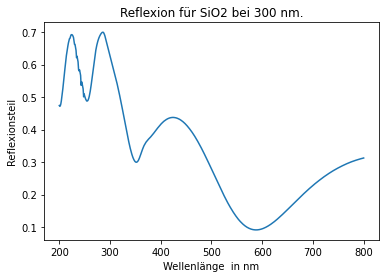

In [6]:
# pyplot Diagramm erstellen aus den berechneten Daten
plt.figure()
plt.plot(lambda_list, R_list)
# Beschriftung der Achsen
plt.xlabel('Wellenlänge  in nm')
plt.ylabel('Reflexionsteil')
# Diagramtitel
plt.title('Reflexion für SiO2 bei ' + str(SiO2_thickness) + ' nm.')

Die von der Webseite "filmetrics.com" geladenen Werte für die SiO2 Dicke 300 nm
werden eingelesen mit den im Programmberechneten Werten verglichen und das sich
ergebene Delta wird grafisch als Betrag in einem Diagramm dargestellt.

Anzahl gelesener Werte: 602
Rohdaten: 
[['Wavelength (nm)', 'Reflectance'], ['200', '0.6408375'], ['201', '0.6226174'], ['202', '0.602805'], ['203', '0.5817164'], ['204', '0.5597803'], ['205', '0.5376063'], ['206', '0.5159316'], ['207', '0.495638'], ['208', '0.4776542'], ['209', '0.4629021'], ['210', '0.4521674'], ['211', '0.446082'], ['212', '0.4462349'], ['213', '0.4523695'], ['214', '0.4637287'], ['215', '0.4792384'], ['216', '0.4974214'], ['217', '0.5173422'], ['218', '0.5379822'], ['219', '0.5584997'], ['220', '0.5782498'], ['221', '0.5965768'], ['222', '0.6133814'], ['223', '0.6284461'], ['224', '0.641572'], ['225', '0.6527656'], ['226', '0.6619704'], ['227', '0.6693498'], ['228', '0.6749767'], ['229', '0.6788547'], ['230', '0.6811935'], ['231', '0.682169'], ['232', '0.6819752'], ['233', '0.6807187'], ['234', '0.6787233'], ['235', '0.6761159'], ['236', '0.6730102'], ['237', '0.6696065'], ['238', '0.6662907'], ['239', '0.6628114'], ['240', '0.6591646'], ['241', '0.6556601'], ['242

Text(0.5, 1.0, 'Delta Wertdiagramm bei 300 nm.')

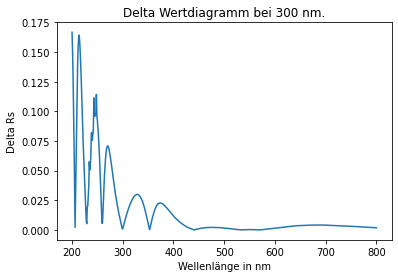

In [8]:
# Nutzen der vorberechneten Daten von filmetrics.com
with open('/content/Reflectance_precalc.txt', newline='') as f:
    reader = csv.reader(f, delimiter='\t')
    data = list(reader)
# Ausgabe der Anzahl der Tupel
print('Anzahl gelesener Werte: '+str(len(data)))
# Ausgabe Rohdaten
print("Rohdaten: ")
print(data)
print()

# Definiere Listen für Datenzusammenfassung
all_calc_data= []
deltas=[]
# Titel auf Zeile 0 werden ignoriert, start mit 1
# Achtung R[] startet mit 0 so i-1 ist der Index
# für alle Daten
for i in range(1,len(data)):
  # temporäres Datenfeld
  tmp= []
  # wenn Daten vorhanden
  if(len(data[i])!=0): 
    # Anhängen der Werte aus Datei
    tmp.append(float(data[i][0]))
    tmp.append(float(data[i][1]))
    # Anhängen der berechneten Rs
    tmp.append(float(R_list[i-1]))
    # ermittelen des Betrags delta 
    deltaRi= abs(float(data[i][1])-float(R_list[i-1]))
    # Anhängen delta in Liste
    tmp.append(deltaRi)
    # Anhängen in doppelte Struktur, besser wegen Diagramm
    deltas.append(deltaRi)
    # temporäre 4-Tupel in die Datensammlung einfügen
    all_calc_data.append(tmp)  
print("TMM-Werte, Filmetrics-Werte, Delta-Werte:")    
print(all_calc_data)
print()
# Neues Diagramm, mit Deltas pro Wellenlänge
plt.figure()
plt.plot(lambda_list, deltas)
plt.xlabel('Wellenlänge in nm')
plt.ylabel('Delta Rs')
plt.title('Delta Wertdiagramm bei 300 nm.')


Darstellung der berechneten Werte für 300 nm gegenüber den Filmetrics.com Werten. (Achtung macht nur bei Eingabe 300 nm Sinn!)

Text(0.5, 1.0, 'Reflexion für SiO2 bei 300 nm.')

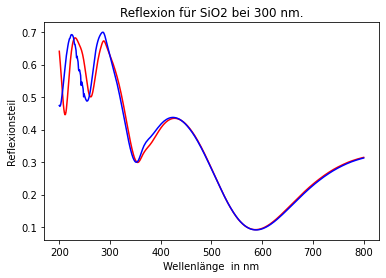

In [14]:
# pyplot Diagramm erstellen aus den berechneten Daten und vorberechneten Daten
# Zugriff auf die ergebnis spalten (columns)
# [0] Wellenlänge
# [1] Filmetrics Daten
# [2] eigene berechnete Daten
werte= list(zip(*all_calc_data))

plt.figure()
plt.plot(werte[0], werte[1], color="red")
plt.plot(werte[0], werte[2], color="blue")
# Beschriftung der Achsen
plt.xlabel('Wellenlänge  in nm')
plt.ylabel('Reflexionsteil')
# Diagramtitel
plt.title('Reflexion für SiO2 bei ' + str(SiO2_thickness) + ' nm.')

Zuletzt werden die Werte inklusiver der Delta-Werte in eine CSV Datei gespeichert.

In [ ]:
with open('/content/R_calc_vals.txt', 'w') as f:
    writer = csv.writer(f, delimiter='\t')
    writer.writerows(all_calc_data)